# Erdos-Renyi models

In [227]:
using Plots
using LightGraphs
using GraphRecipes
using Combinatorics: combinations

## ER model *A*
Let $0 \leq K \leq M = N (N - 1) / 2$. The model denoted as $G_{N,K}^\text{ER}$, consists in the ensemble (distribution) of graphs with $N$ nodes generated by connecting $K$ randomly selected pairs of nodes, uniformly mong the $M$ possible pairs.   Each graph $G = (\mathcal N, \mathcal L)$ with $\vert\mathcal N\vert = N$, $\vert\mathcal L\vert = K$ is assigned the same probability.

The probability of finding a given graph with $N$ nodes and $K$ edges is given by

$$
    P_G = {M \choose K}^{-1}
$$

In [150]:
function er_model_a(N::Int64, K::Int64)
    G = SimpleGraph(N)
    nodes = 1:N
    possible_links = collect(combinations(nodes, 2))
    links_ix = Set(1:M)
    for k = 1:K
        ix = rand(links_ix)
        setdiff!(links_ix, ix)
        n1, n2 = possible_links[ix]
        add_edge!(G, n1, n2)
    end
    return G
end

er_model_a (generic function with 2 methods)

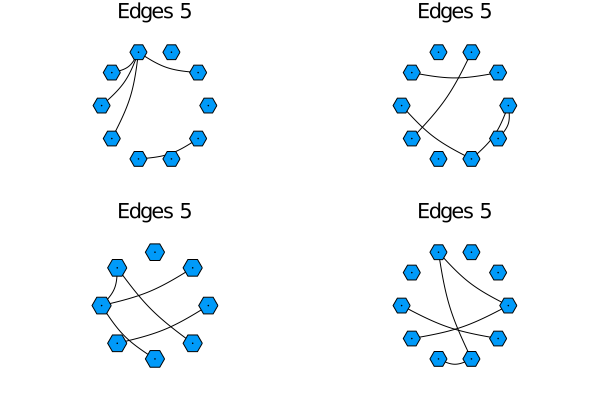

In [158]:
l = @layout[a b; c d]

N, K = 10, 5
Gs = [er_model_a(N, K) for _ in 1:4]
Gs_plots = [graphplot(G, title="Edges $(ne(G))", markersize=0.4, method=:circular) for G in Gs]
plot(Gs_plots..., layout=l)

## ER model *B*

Let $0 \leq p \leq 1$. The model, denoted as $G_{N,p}^\text{ER}$, consists in the ensemble of graphs with $N$ nodes obtained by connecting each pair of nodes with probability $p$.

The probablity of finding a specific graph with $N$ nodes and $K$ edges is given by

$$
    P_G = p^K (1-p) ^ {N - K}
$$

With $K \leq M$.

The probability of finding a graph with $K$ edges is given by

$$
    p(K) = {M \choose K} p ^ K (1 - p) ^ {M - K}
$$

In [164]:
function er_model_b(N::Int64, p::Float64)
    G = SimpleGraph(N)
    nodes = 1:N
    possible_links = combinations(nodes, 2)
    for (n1, n2) in possible_links
        if p > rand()
            add_edge!(G, n1, n2)
        end
    end
    return G
end

er_model_b (generic function with 2 methods)

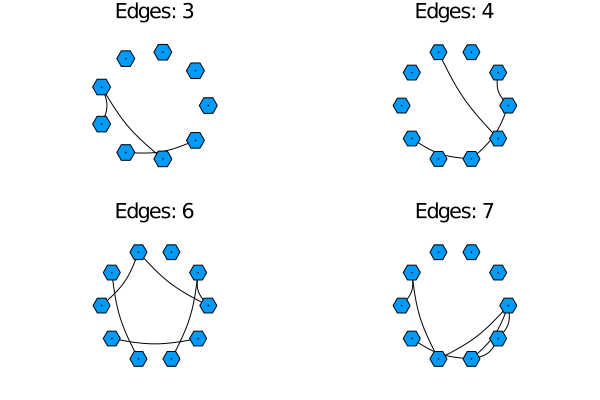

In [171]:
l = @layout[a b; c d]

N = 10
M = N * (N - 1) / 2
p = K / M
Gs = [er_model_b(N, p) for _ in 1:4]
Gs_plots = [graphplot(G, title="Edges: $(ne(G))", markersize=0.4, method=:circular) for G in Gs]
plot(Gs_plots..., layout=l)

# Degree Distribution

In [243]:
bin_pdf(N, k, p) = binomial.(N, k) .* p .^ k .* (1 .- p) .^ (N .- k)
pois_pdf(λ, k) = λ .^ k .* exp(-λ) ./ factorial(big.(k))

pois_pdf (generic function with 1 method)

In [276]:
N = 60
p = 0.3
G = er_model_b(N, p)

{60, 532} undirected simple Int64 graph

In [277]:
degrees = [length(neighbors(G, n)) for n=1:N]
elements = Dict{Int64, Int64}()
for deg in degrees
    if deg in keys(elements)
        elements[deg] += 1
    else
        elements[deg] =1
    end
end

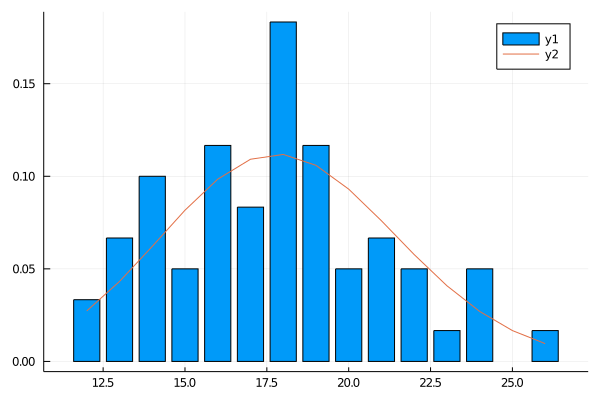

In [280]:
bar(collect(keys(elements)), collect(values(elements))./ N)
k_vals = minimum(degrees):maximum(degrees)
plot!(k_vals, bin_pdf(N, k_vals, p))